In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('./NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv', 
                 thousands=',', skiprows=3, header = 1)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [3]:
df.columns = ['City',
 'Population',
 'Violent_crime',
 'Murder_nonnegligent_manslaughter',
 'Rape_revised_definition',
 'Rape_legacy_definition',
 'Robbery',
 'Aggravated_assault',
 'Property_crime',
 'Burglary',
 'Larceny_theft',
 'Motor_vehicle_theft',
 'Arson3']
df.head()

,City,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [5]:
df.tail()

,City,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
343,Woodbury Town,10685.000,3.000,0.000,nan,0.000,2.000,1.000,541.000,9.000,529.000,3.000,nan
344,Woodridge Village,829.000,7.000,0.000,nan,0.000,0.000,7.000,17.000,8.000,9.000,0.000,0.000
345,Woodstock Town,5931.000,2.000,0.000,nan,0.000,0.000,2.000,58.000,13.000,45.000,0.000,nan
346,Yonkers,199134.000,1036.000,6.000,nan,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000,10.000
347,Yorktown Town,36643.000,15.000,0.000,nan,0.000,2.000,13.000,334.000,45.000,287.000,2.000,nan


In [4]:
# The lalst 3 rows in the data refer to figures, so let's drop these
df = df.iloc[:348,:]

In [6]:
# create a few new features
df["PopulationSquared"] = df.Population**2
df['Robberies'] = np.where(df['Robbery']>0,1,0)
df['Murders'] = np.where(df['Murder_nonnegligent_manslaughter']>0,1,0)

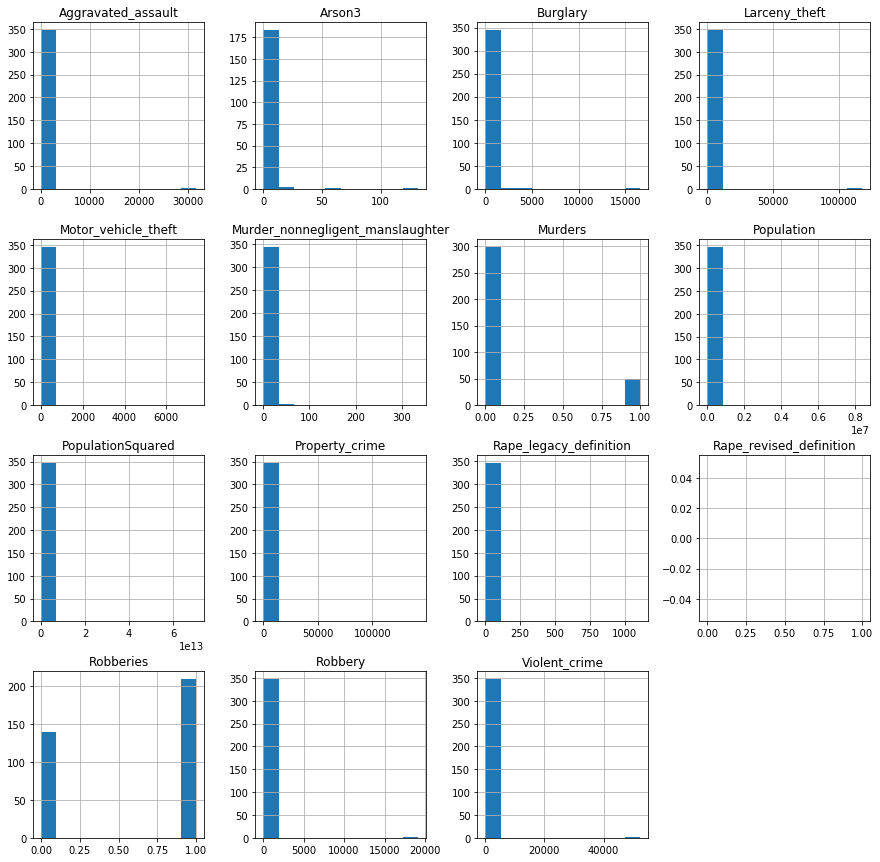

In [7]:
df.hist(figsize=(15,15))
plt.show()

In [8]:
# Let's take a closer look at Population
df.Population.describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64

In [15]:
# There appears to be at least one outlier in terms of Population
df.query("Population > 500000")

,City,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,PopulationSquared,Robberies,Murders
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan,70494931807876.000,1,1


In [18]:
# No suprice, its NYC!
df.describe()

,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,PopulationSquared,Robberies,Murders
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872,203554650960.236,0.601,0.141
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693,3778875542708.129,0.490,0.348
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000,9018117.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000,52325684.500,1.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000,339753567.000,1.000,0.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000,70494931807876.000,1.000,1.000


In [17]:
df.query("City != 'New York'").describe()

,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,PopulationSquared,Robberies,Murders
count,347.000,347.000,347.000,0.000,347.000,347.000,347.000,347.000,347.000,347.000,347.000,187.000,347.000,347.000,347.000
mean,15956.686,51.213,0.605,nan,2.677,17.867,30.063,385.752,72.173,298.994,14.585,1.872,985840709.758,0.599,0.138
std,27080.219,236.667,3.707,nan,10.741,94.972,128.783,1034.369,264.941,715.232,67.682,10.693,5067232380.434,0.491,0.346
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000
25%,2997.000,2.000,0.000,nan,0.000,0.000,1.000,40.000,6.000,31.000,0.000,0.000,8982153.000,0.000,0.000
50%,7187.000,6.000,0.000,nan,0.000,1.000,4.000,112.000,17.000,94.000,2.000,0.000,51652969.000,1.000,0.000
75%,18160.500,21.500,0.000,nan,2.000,5.000,14.000,340.500,51.000,284.500,7.000,1.000,329804222.500,1.000,0.000
max,258789.000,3249.000,47.000,nan,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,132.000,66971746521.000,1.000,1.000


In [20]:
df[df.Violent_crime==3249.0]

,City,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,PopulationSquared,Robberies,Murders
35,Buffalo,258789.000,3249.000,47.000,nan,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,nan,66971746521.000,1,1


In [21]:
# Large cities sway the stats a lot, so lets look at how the other cities fare
df.query("Population < 18427.500").describe()

,Population,Violent_crime,Murder_nonnegligent_manslaughter,Rape_revised_definition,Rape_legacy_definition,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,PopulationSquared,Robberies,Murders
count,261.000,261.000,261.000,0.000,261.000,261.000,261.000,261.000,261.000,261.000,261.000,145.000,261.000,261.000,261.000
mean,6071.218,8.080,0.054,nan,0.705,1.632,5.690,119.345,19.226,97.736,2.383,0.345,56775915.885,0.479,0.054
std,4471.334,12.259,0.226,nan,1.598,3.025,8.593,140.709,23.494,118.640,3.822,0.861,75699545.316,0.501,0.226
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000
25%,2381.000,1.000,0.000,nan,0.000,0.000,0.000,29.000,4.000,20.000,0.000,0.000,5669161.000,0.000,0.000
50%,4704.000,3.000,0.000,nan,0.000,0.000,3.000,66.000,11.000,53.000,1.000,0.000,22127616.000,0.000,0.000
75%,8544.000,9.000,0.000,nan,1.000,2.000,7.000,156.000,23.000,121.000,3.000,0.000,72999936.000,1.000,0.000
max,18182.000,89.000,1.000,nan,13.000,20.000,64.000,949.000,138.000,828.000,35.000,5.000,330585124.000,1.000,1.000


So cities with a population greater than the 3rd quantile (18427) are "anomalies" compared to the other cities; I recommend not removing these rows instead keep this fact in mind when performing any analysis on this data. 